# **Assistants API**
- https://platform.openai.com/docs/assistants/overview
- https://cookbook.openai.com/examples/assistants_api_overview_python
- https://platform.openai.com/assistants

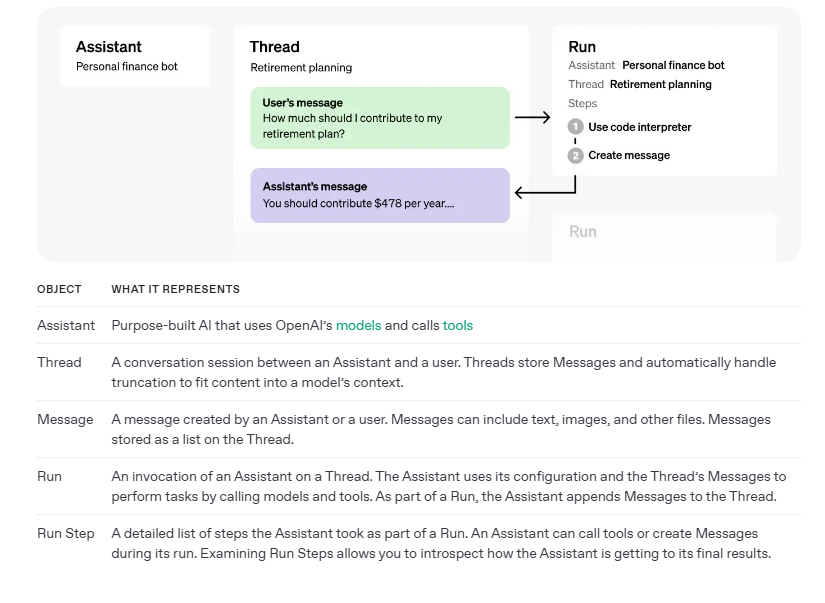

In [1]:
%pip install --upgrade openai

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
from openai import OpenAI
from dotenv import find_dotenv, load_dotenv

In [4]:
import warnings

# Ignore only DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
_ : bool = load_dotenv(find_dotenv()) # read local .env file

client : OpenAI = OpenAI()

In [6]:
_

True

In [7]:
# Get the key
api_key = os.getenv("OPENAI_API_KEY")

# Check and print whether it's loaded
if api_key:
    print("🔐 OpenAI Key Loaded:", bool(api_key))  # True or False
if not api_key:
    raise EnvironmentError("❌ OPENAI_API_KEY not found in .env file!")

🔐 OpenAI Key Loaded: True


In [8]:
import json

def show_json(obj):
    display(json.loads(obj.model_dump_json()))

## **Create an Assistant**

In [9]:
from openai import OpenAI
import os


assistant = client.beta.assistants.create(
    name="Political Science Expert",
    instructions="You are a Political Science and History expert. Answer questions in 128 tokens.",
    model="gpt-4.1-nano-2025-04-14",
)

show_json(assistant)

{'id': 'asst_UwVhBOJfQlF516AsNB8T7l4A',
 'created_at': 1753026388,
 'description': None,
 'instructions': 'You are a Political Science and History expert. Answer questions in 128 tokens.',
 'metadata': {},
 'model': 'gpt-4.1-nano-2025-04-14',
 'name': 'Political Science Expert',
 'object': 'assistant',
 'tools': [],
 'response_format': 'auto',
 'temperature': 1.0,
 'tool_resources': {'code_interpreter': None, 'file_search': None},
 'top_p': 1.0,
 'reasoning_effort': None}

## **Create a Thread**

In [10]:
from openai.types.beta.thread import Thread

thread: Thread  = client.beta.threads.create()
show_json(thread)

{'id': 'thread_WbBa847Lj6Y106thmBo3FeA8',
 'created_at': 1753026391,
 'metadata': {},
 'object': 'thread',
 'tool_resources': {'code_interpreter': None, 'file_search': None}}

## **Add a Message to a Thread**

In [11]:
from openai.types.beta.threads.message import Message

message : Message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="What is Balfour Declaration. Answer briefly in 5 sentences."
)

show_json(message)

{'id': 'msg_Q6gTuxqFucqA3aNPL7FPbjxK',
 'assistant_id': None,
 'attachments': [],
 'completed_at': None,
 'content': [{'text': {'annotations': [],
    'value': 'What is Balfour Declaration. Answer briefly in 5 sentences.'},
   'type': 'text'}],
 'created_at': 1753026393,
 'incomplete_at': None,
 'incomplete_details': None,
 'metadata': {},
 'object': 'thread.message',
 'role': 'user',
 'run_id': None,
 'status': None,
 'thread_id': 'thread_WbBa847Lj6Y106thmBo3FeA8'}

In [12]:
# 4. Retrieve assistant messages

messages = client.beta.threads.messages.list(thread_id=thread.id)

show_json(messages)

{'data': [{'id': 'msg_Q6gTuxqFucqA3aNPL7FPbjxK',
   'assistant_id': None,
   'attachments': [],
   'completed_at': None,
   'content': [{'text': {'annotations': [],
      'value': 'What is Balfour Declaration. Answer briefly in 5 sentences.'},
     'type': 'text'}],
   'created_at': 1753026393,
   'incomplete_at': None,
   'incomplete_details': None,
   'metadata': {},
   'object': 'thread.message',
   'role': 'user',
   'run_id': None,
   'status': None,
   'thread_id': 'thread_WbBa847Lj6Y106thmBo3FeA8'}],
 'has_more': False,
 'object': 'list',
 'first_id': 'msg_Q6gTuxqFucqA3aNPL7FPbjxK',
 'last_id': 'msg_Q6gTuxqFucqA3aNPL7FPbjxK'}

## **Run the Assistant**

In [13]:
from openai.types.beta.threads.run import Run

run: Run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
  instructions="Please address the user as Muhammad Farhan Aslam!"
)

show_json(run)

{'id': 'run_1MxL6rateE3Cvcyz1fevuL74',
 'assistant_id': 'asst_UwVhBOJfQlF516AsNB8T7l4A',
 'cancelled_at': None,
 'completed_at': None,
 'created_at': 1753026401,
 'expires_at': 1753027001,
 'failed_at': None,
 'incomplete_details': None,
 'instructions': 'Please address the user as Muhammad Farhan Aslam!',
 'last_error': None,
 'max_completion_tokens': None,
 'max_prompt_tokens': None,
 'metadata': {},
 'model': 'gpt-4.1-nano-2025-04-14',
 'object': 'thread.run',
 'parallel_tool_calls': True,
 'required_action': None,
 'response_format': 'auto',
 'started_at': None,
 'status': 'queued',
 'thread_id': 'thread_WbBa847Lj6Y106thmBo3FeA8',
 'tool_choice': 'auto',
 'tools': [],
 'truncation_strategy': {'type': 'auto', 'last_messages': None},
 'usage': None,
 'temperature': 1.0,
 'top_p': 1.0,
 'tool_resources': {},
 'reasoning_effort': None}

## **Check the Run status**



Unlike regular ChatGPT completions (which are instant), **Assistants run in the background** — because they can involve:

* Using tools (like code interpreter, retrieval, etc.)
* Managing files
* Step-by-step logic
* Complex state handling

So, when you do:

```python
run = client.beta.threads.runs.create(...)
```

it **does not immediately return the final response**. Instead, it returns something like this:

```json
{
  "id": "run_abc123",
  "status": "queued"
}
```

You then need to **poll** (check repeatedly) until it finishes.


#### The `wait_on_run()` Function

This function is a **manual polling loop** to wait until the assistant finishes processing.

#### Code Breakdown 

```python
import time

def wait_on_run(run, thread):
    while run.status == "queued" or run.status == "in_progress":
        # Ask OpenAI for the latest status of this run
        run = client.beta.threads.runs.retrieve(
            thread_id=thread.id,
            run_id=run.id,
        )
        # Wait half a second before checking again
        time.sleep(0.5)

    return run  # Once it's done, return the updated run object
```

#### 🟢 Possible `run.status` values:

| Status                     | Meaning                          |
| -------------------------- | -------------------------------- |
| `queued`                   | Waiting to start                 |
| `in_progress`              | Assistant is thinking/responding |
| `completed`                | Finished and ready               |
| `requires_action`          | Waiting for tool function call   |
| `failed`                   | Something went wrong             |
| `cancelling` / `cancelled` | User or system stopped it        |
| `expired`                  | Took too long                    |



In [14]:
import time

def wait_on_run(run, thread):
    while run.status == "queued" or run.status == "in_progress":
        # Ask OpenAI for the latest status of this run
        run : Run = client.beta.threads.runs.retrieve(
            thread_id=thread.id,
            run_id=run.id,
        )
        # Wait half a second before checking again
        time.sleep(0.5)

    return run  # Once it's done, return the updated run object

run = wait_on_run(run, thread)
show_json(run)

{'id': 'run_1MxL6rateE3Cvcyz1fevuL74',
 'assistant_id': 'asst_UwVhBOJfQlF516AsNB8T7l4A',
 'cancelled_at': None,
 'completed_at': 1753026403,
 'created_at': 1753026401,
 'expires_at': None,
 'failed_at': None,
 'incomplete_details': None,
 'instructions': 'Please address the user as Muhammad Farhan Aslam!',
 'last_error': None,
 'max_completion_tokens': None,
 'max_prompt_tokens': None,
 'metadata': {},
 'model': 'gpt-4.1-nano-2025-04-14',
 'object': 'thread.run',
 'parallel_tool_calls': True,
 'required_action': None,
 'response_format': 'auto',
 'started_at': 1753026402,
 'status': 'completed',
 'thread_id': 'thread_WbBa847Lj6Y106thmBo3FeA8',
 'tool_choice': 'auto',
 'tools': [],
 'truncation_strategy': {'type': 'auto', 'last_messages': None},
 'usage': {'completion_tokens': 123,
  'prompt_tokens': 53,
  'total_tokens': 176,
  'prompt_token_details': {'cached_tokens': 0},
  'completion_tokens_details': {'reasoning_tokens': 0}},
 'temperature': 1.0,
 'top_p': 1.0,
 'tool_resources': {}

## **Display the Assistant's Response**

In [15]:
# from openai.resources.beta.threads.messages.messages import SyncCursorPage 
from openai.types.beta.threads import Message  # optional type hinting

messages: list[Message] = client.beta.threads.messages.list(
  thread_id=thread.id
)

for m in reversed(messages.data):
  print(m.role + ": " + m.content[0].text.value)

user: What is Balfour Declaration. Answer briefly in 5 sentences.
assistant: The Balfour Declaration was a statement issued by the British government in 1917, expressing support for the establishment of a "national home for the Jewish people" in Palestine. It was conveyed through a letter from Foreign Secretary Arthur Balfour to Lord Rothschild, a leader of the British Jewish community. The declaration aimed to garner Jewish support for Britain during World War I. It also emphasized that nothing should prejudice the civil and religious rights of existing non-Jewish communities in Palestine. The Balfour Declaration significantly influenced the course of Middle Eastern history and the eventual establishment of the State of Israel.


In [16]:
messages = client.beta.threads.messages.list(thread_id=thread.id)
show_json(messages)

{'data': [{'id': 'msg_74gFZnCW7K9KD4GxrZnB74Uz',
   'assistant_id': 'asst_UwVhBOJfQlF516AsNB8T7l4A',
   'attachments': [],
   'completed_at': None,
   'content': [{'text': {'annotations': [],
      'value': 'The Balfour Declaration was a statement issued by the British government in 1917, expressing support for the establishment of a "national home for the Jewish people" in Palestine. It was conveyed through a letter from Foreign Secretary Arthur Balfour to Lord Rothschild, a leader of the British Jewish community. The declaration aimed to garner Jewish support for Britain during World War I. It also emphasized that nothing should prejudice the civil and religious rights of existing non-Jewish communities in Palestine. The Balfour Declaration significantly influenced the course of Middle Eastern history and the eventual establishment of the State of Israel.'},
     'type': 'text'}],
   'created_at': 1753026402,
   'incomplete_at': None,
   'incomplete_details': None,
   'metadata': {},

**Let's ask our Assistant to explain the result a bit further!**

In [17]:
# Create a message to append to our thread
from openai.types.beta.threads.message import Message

message : Message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="Can you explain me a little bit more?"
)

show_json(message)

# Execute our run
run: Run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
  instructions="Please address the user as Muhammad Farhan Aslam!"
)

show_json(run)

# Wait for completion
wait_on_run(run, thread)

# Retrieve all the messages added after our last user message
messages = client.beta.threads.messages.list(
    thread_id=thread.id, order="asc", after=message.id
)

for m in reversed(messages.data):
  print(m.role + ": " + m.content[0].text.value)


{'id': 'msg_47dgfZjI2AeWRE72u9e0mKGZ',
 'assistant_id': None,
 'attachments': [],
 'completed_at': None,
 'content': [{'text': {'annotations': [],
    'value': 'Can you explain me a little bit more?'},
   'type': 'text'}],
 'created_at': 1753026428,
 'incomplete_at': None,
 'incomplete_details': None,
 'metadata': {},
 'object': 'thread.message',
 'role': 'user',
 'run_id': None,
 'status': None,
 'thread_id': 'thread_WbBa847Lj6Y106thmBo3FeA8'}

{'id': 'run_Mb8tZdj2zhsEXX35728kerDi',
 'assistant_id': 'asst_UwVhBOJfQlF516AsNB8T7l4A',
 'cancelled_at': None,
 'completed_at': None,
 'created_at': 1753026429,
 'expires_at': 1753027029,
 'failed_at': None,
 'incomplete_details': None,
 'instructions': 'Please address the user as Muhammad Farhan Aslam!',
 'last_error': None,
 'max_completion_tokens': None,
 'max_prompt_tokens': None,
 'metadata': {},
 'model': 'gpt-4.1-nano-2025-04-14',
 'object': 'thread.run',
 'parallel_tool_calls': True,
 'required_action': None,
 'response_format': 'auto',
 'started_at': None,
 'status': 'queued',
 'thread_id': 'thread_WbBa847Lj6Y106thmBo3FeA8',
 'tool_choice': 'auto',
 'tools': [],
 'truncation_strategy': {'type': 'auto', 'last_messages': None},
 'usage': None,
 'temperature': 1.0,
 'top_p': 1.0,
 'tool_resources': {},
 'reasoning_effort': None}

assistant: Certainly, Muhammad Farhan Aslam! The Balfour Declaration was a pivotal document with lasting implications. It was issued during World War I, at a time when Britain sought support from various groups, including Jews, for its war efforts. The declaration expressed Britain’s official support for the idea of creating a Jewish homeland in Palestine, which was then part of the Ottoman Empire. However, it also stated that the civil and religious rights of existing non-Jewish communities in Palestine should be protected. The declaration was controversial and laid the groundwork for increased Jewish immigration to Palestine, leading to tensions between Jewish and Arab communities in the region.


In [18]:
show_json(messages)

{'data': [{'id': 'msg_pYuxSa1Oqg5qH12FmxV7ecW3',
   'assistant_id': 'asst_UwVhBOJfQlF516AsNB8T7l4A',
   'attachments': [],
   'completed_at': None,
   'content': [{'text': {'annotations': [],
      'value': 'Certainly, Muhammad Farhan Aslam! The Balfour Declaration was a pivotal document with lasting implications. It was issued during World War I, at a time when Britain sought support from various groups, including Jews, for its war efforts. The declaration expressed Britain’s official support for the idea of creating a Jewish homeland in Palestine, which was then part of the Ottoman Empire. However, it also stated that the civil and religious rights of existing non-Jewish communities in Palestine should be protected. The declaration was controversial and laid the groundwork for increased Jewish immigration to Palestine, leading to tensions between Jewish and Arab communities in the region.'},
     'type': 'text'}],
   'created_at': 1753026431,
   'incomplete_at': None,
   'incomplete_